# Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grade.


Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in fou years.


Dataset Link-
•  https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Grades/Grades.cs


In [110]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')

In [111]:
# Loading Data
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [112]:
# Dimension of Data
print('Dataset has {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

Dataset has 571 rows and 43 columns.


In [113]:
# Columns in dataset
print(df.columns.tolist())

['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA']


CGPA is Target Variable Rest All are independent variable.

# EDA

In [114]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

Two Types of Data present in dataset :- float, object.

In [115]:
# Values Counts And total number of unique Values in each columns
for d in df.columns:
    print(df[d].value_counts())
    print('Total unique values in {}:-'.format(d),df[d].nunique())
    print('\n')

CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: Seat No., Length: 571, dtype: int64
Total unique values in Seat No.:- 571


A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64
Total unique values in PH-121:- 13


A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64
Total unique values in HS-101:- 12


A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64
Total unique values in CY-105:- 13


A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64
Total unique values in HS-105/12:- 13


A-    105
A     1

1) In Seat No. column all 571 rows have unique values.
2) Target Column CGPA has 491 Unique values. And values are continuous, Hence it is a Regression Task.
3) All Other Columns have 11 to 14 unique values.

# Null Values

In [116]:
# Checking Null Values in data
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

1) Apart from PH-121,HS-101 and CS-105 every other independent Column has null values.
2) CS-406 has 85 and CS-412 has 79 null values.

In [117]:
# Creating copy of dataframe to try different approches.
df1=df.copy()
df2=df.copy()

First Going to fill all Null Values.

In [118]:
# Filling Nan Values
for i in df.columns:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [119]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [120]:
# Description of Data
df.describe(include='all')

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571,571,571,571,571,571,571,571,571,571,...,571,571,571,571,571,571,571,571,571,571.000000
unique,571,13,12,13,13,13,11,13,13,12,...,14,12,11,13,14,13,12,12,13,NaN
top,CS-97001,A-,A-,A,A,A-,A,A-,A-,A-,...,A+,B-,A,B,A-,A,A-,A-,A-,NaN
freq,1,112,82,178,97,107,151,118,107,139,...,103,91,145,98,262,189,133,136,236,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.954888
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.620552
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.538000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.029000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.451000


Seat No. Column has Unique value in every row and CGPA can't be decided based on Seat No . We can drop this column from the Dataset.

In [121]:
# Dropping Seat No.
df.drop('Seat No.',axis=1,inplace=True)

In [122]:
df.shape

(571, 42)

In [123]:
# Checking Duplicate data
df.duplicated().sum()

0

No Duplicates present in dataset.

# Graphical Analysis

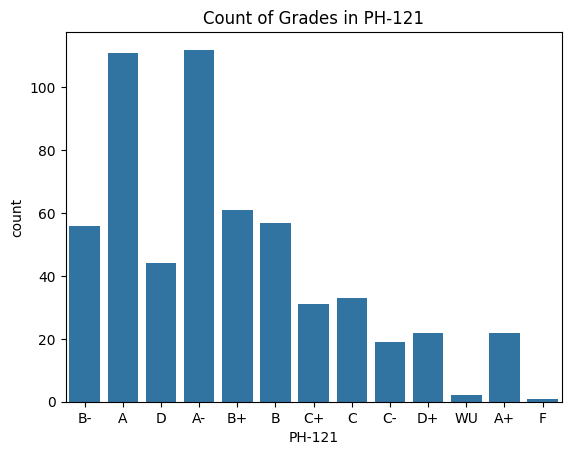

In [124]:
# Count of Grades in PH-121
sns.countplot(x='PH-121',data=df)
plt.title('Count of Grades in PH-121')
plt.show()

In PH-121 Count of Students got 'A' and 'A-' is higher than other grades.

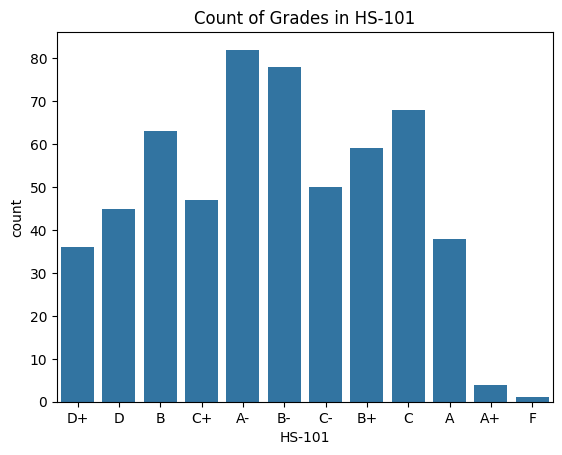

In [125]:
# Count of Grades in HS-101
sns.countplot(x='HS-101',data=df)
plt.title('Count of Grades in HS-101')
plt.show()

In HS-101 count of Students got 'A-' is Highest.

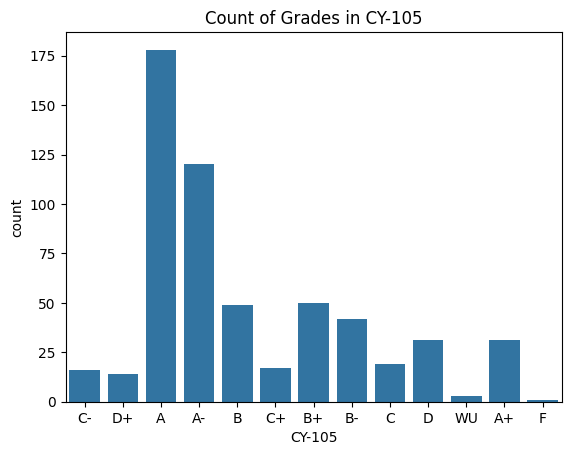

In [126]:
# Count of Grades in CY-105
sns.countplot(x='CY-105',data=df)
plt.title('Count of Grades in CY-105')
plt.show()

In CY-105 most Students got "A".

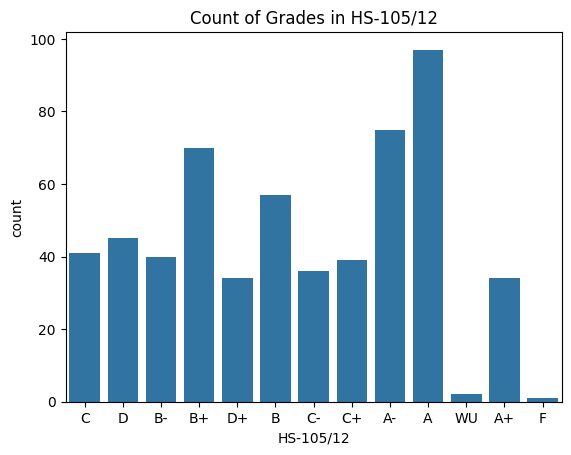

In [127]:
# Count of Grades in HS-105/12
sns.countplot(x='HS-105/12',data=df)
plt.title('Count of Grades in HS-105/12')
plt.show()

In HS-105/12 most students got "A".

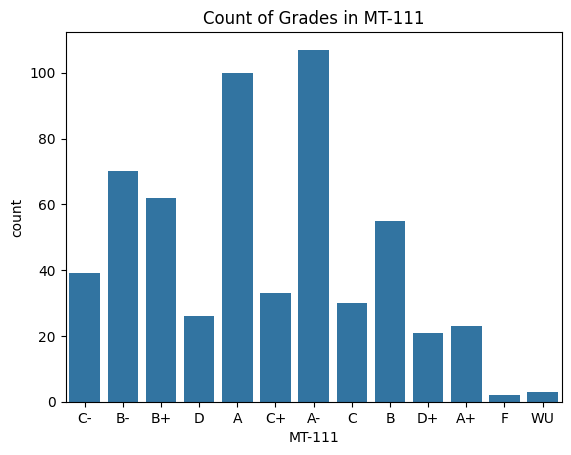

In [128]:
# Count of Grades in MT-111
sns.countplot(x='MT-111',data=df)
plt.title('Count of Grades in MT-111')
plt.show()

In MT-111 Most Students got "A-".

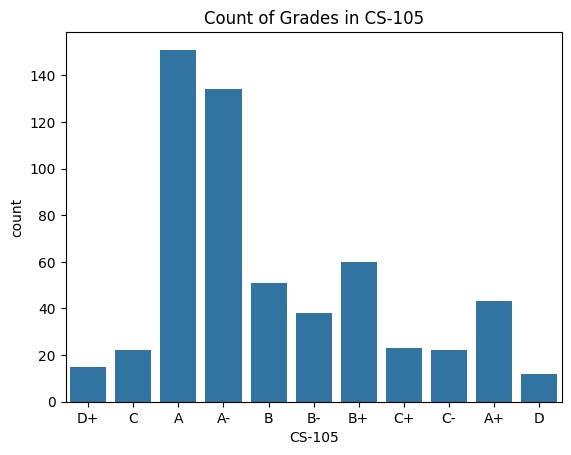

In [129]:
# Count of Grades in CS-105
sns.countplot(x='CS-105',data=df)
plt.title('Count of Grades in CS-105')
plt.show()

In CS-105 most Students got "A".

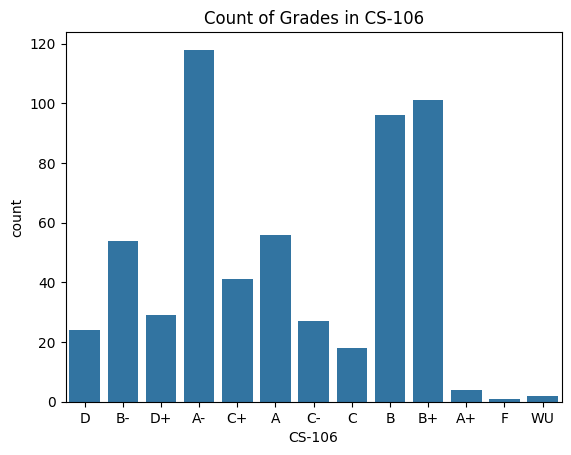

In [130]:
# Count of Grades in CS-106
sns.countplot(x='CS-106',data=df)
plt.title('Count of Grades in CS-106')
plt.show()

In CS-106 most students got "A-".

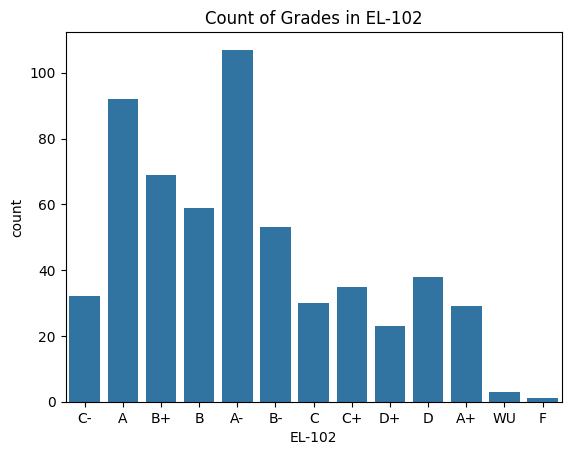

In [131]:
# Count of Grades in EL-102
sns.countplot(x='EL-102',data=df)
plt.title('Count of Grades in EL-102')
plt.show()

In EL-102 most Students got "A-".

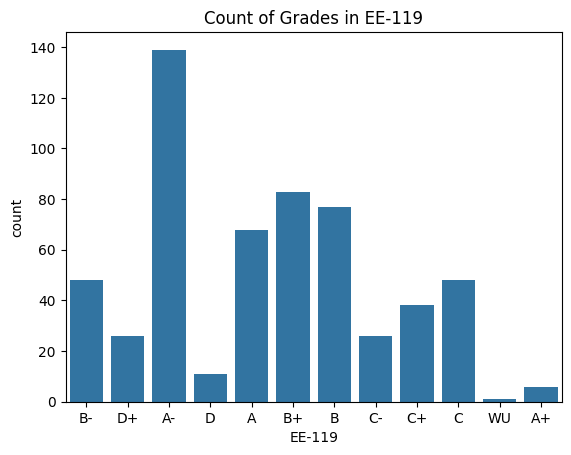

In [132]:
# Count of Grades in EE-119
sns.countplot(x='EE-119',data=df)
plt.title('Count of Grades in EE-119')
plt.show()

In EE-119 most students got "A-".

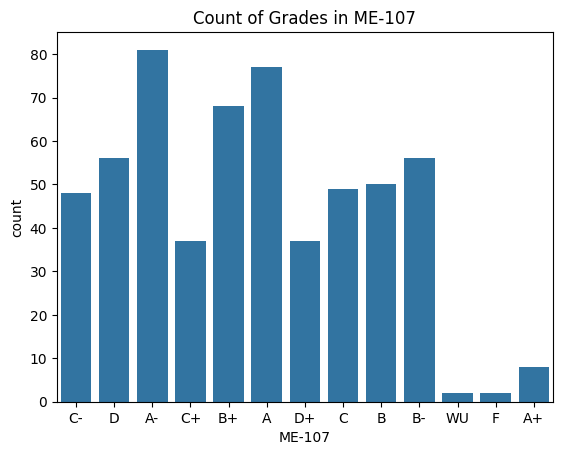

In [133]:
# Count of Grades in ME-107
sns.countplot(x='ME-107',data=df)
plt.title('Count of Grades in ME-107')
plt.show()

In ME-107 most students got "A-".

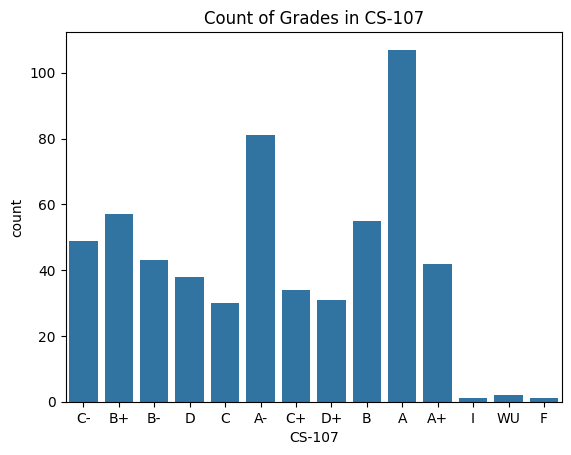

In [134]:
# Count of Grades in CS-107
sns.countplot(x='CS-107',data=df)
plt.title('Count of Grades in CS-107')
plt.show()

In CS-107 most stidents got "A".

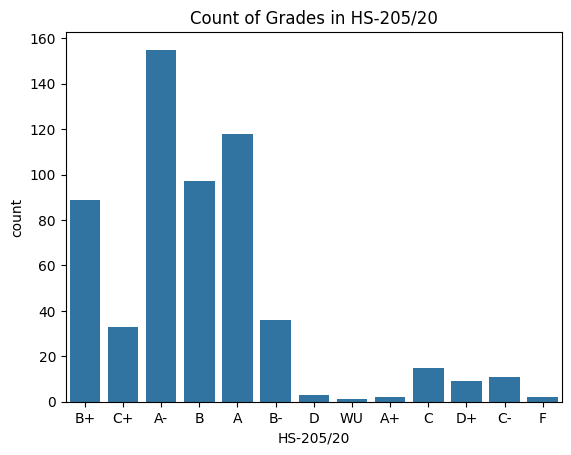

In [135]:
# Count of Grades in HS-205/20
sns.countplot(x='HS-205/20',data=df)
plt.title('Count of Grades in HS-205/20')
plt.show()

In HS-205/20 most students got "A-".

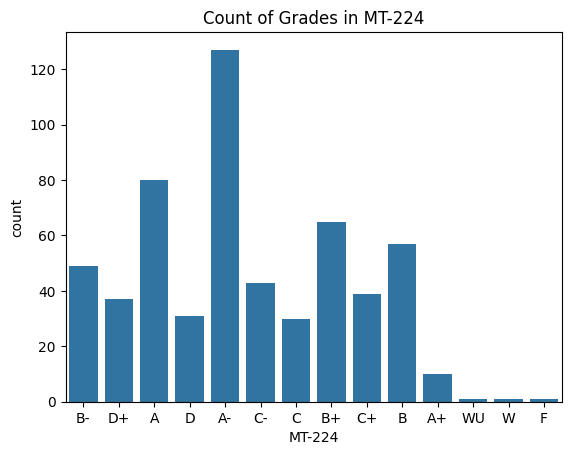

In [136]:
# Count of Grades in MT-224
sns.countplot(x='MT-224',data=df)
plt.title('Count of Grades in MT-224')
plt.show()

In MT-224, Most students got "A-".

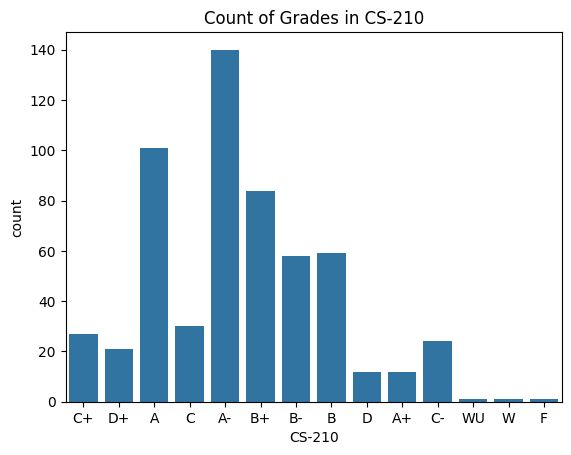

In [137]:
# Count of Grades in CS-210
sns.countplot(x='CS-210',data=df)
plt.title('Count of Grades in CS-210')
plt.show()

In CS-210, Most students got "A-".

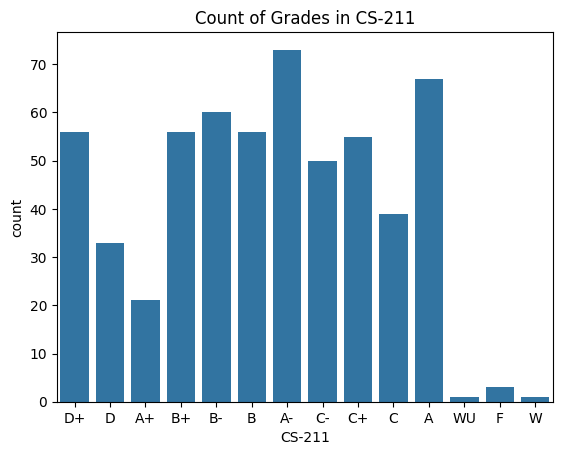

In [138]:
# Count of Grades in CS-211
sns.countplot(x='CS-211',data=df)
plt.title('Count of Grades in CS-211')
plt.show()

In CS-211, Most students got "A-".

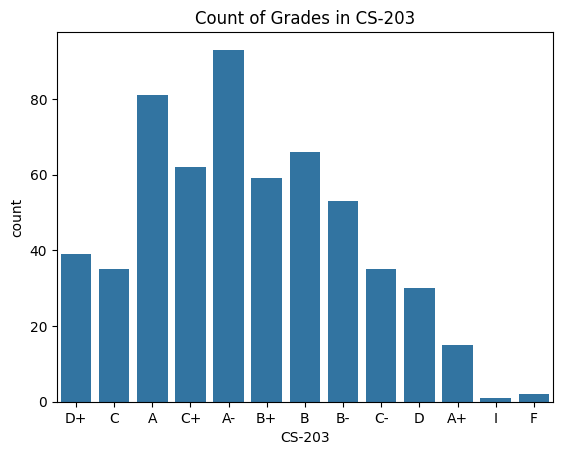

In [139]:
# Count of Grades in CS-203
sns.countplot(x='CS-203',data=df)
plt.title('Count of Grades in CS-203')
plt.show()

In CS-203, Most students got "A-".

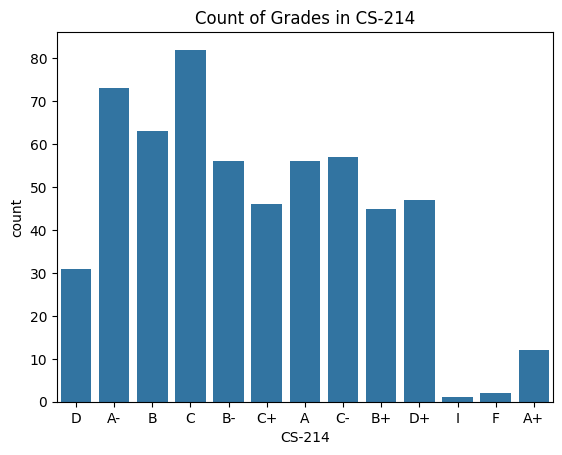

In [140]:
# Count of Grades in CS-214
sns.countplot(x='CS-214',data=df)
plt.title('Count of Grades in CS-214')
plt.show()

In CS-214, Most students got "C".

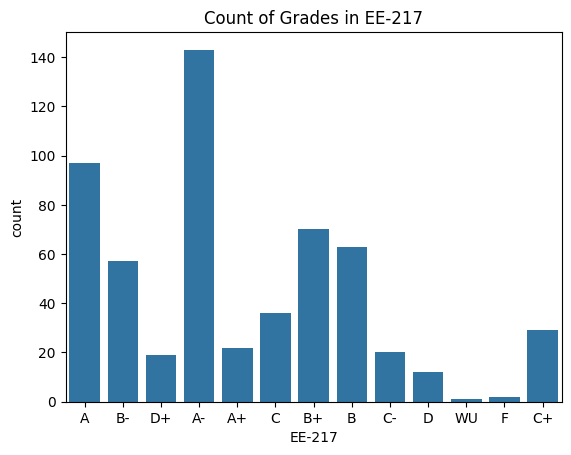

In [141]:
# Count of Grades in EE-217
sns.countplot(x='EE-217',data=df)
plt.title('Count of Grades in EE-217')
plt.show()

In EE-217, Most students got "A-".

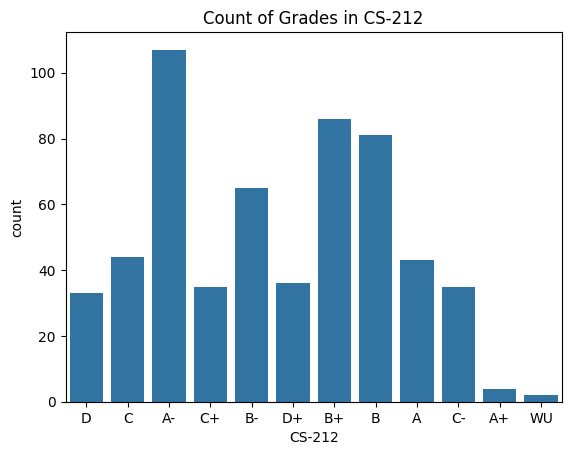

In [142]:
# Count of Grades in CS-212
sns.countplot(x='CS-212',data=df)
plt.title('Count of Grades in CS-212')
plt.show()

In CS-212, Most students got "A-".

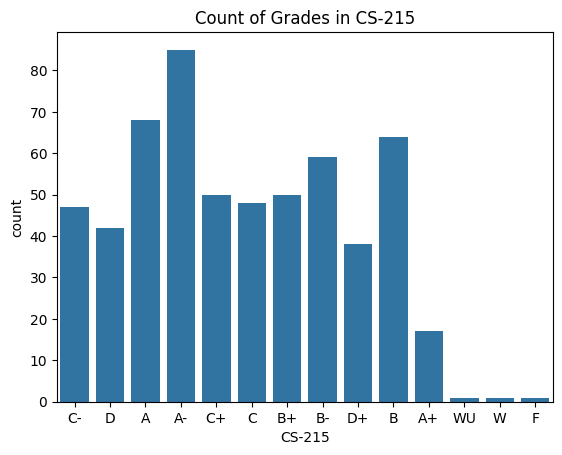

In [143]:
# Count of Grades in CS-215
sns.countplot(x='CS-215',data=df)
plt.title('Count of Grades in CS-215')
plt.show()

In CS-215, Most students got "A-".

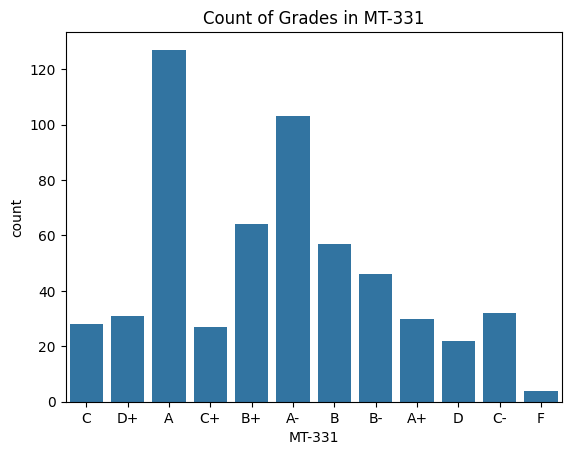

In [144]:
# Count of Grades in MT-331
sns.countplot(x='MT-331',data=df)
plt.title('Count of Grades in MT-331')
plt.show()

In MT-331, Most students got "A".

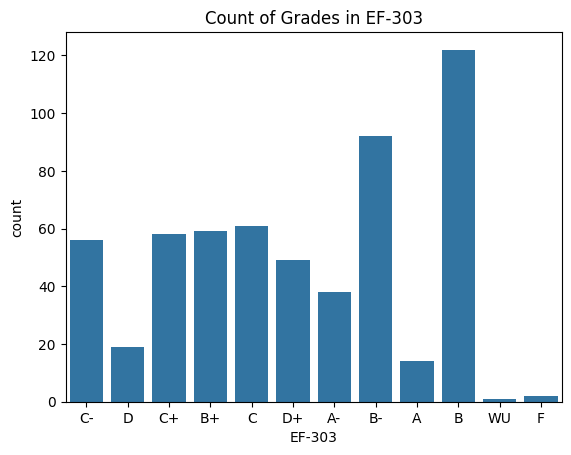

In [145]:
# Count of Grades in EF-303
sns.countplot(x='EF-303',data=df)
plt.title('Count of Grades in EF-303')
plt.show()

In EF-303, Most student got "B".

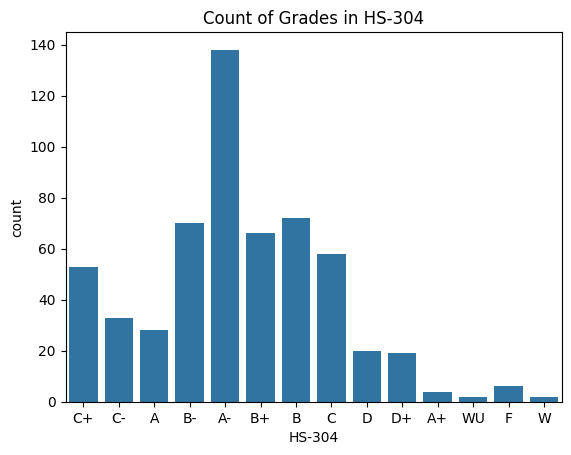

In [146]:
# Count of Grades in HS-304
sns.countplot(x='HS-304',data=df)
plt.title('Count of Grades in HS-304')
plt.show()

In HS-304, Most students got "A-".

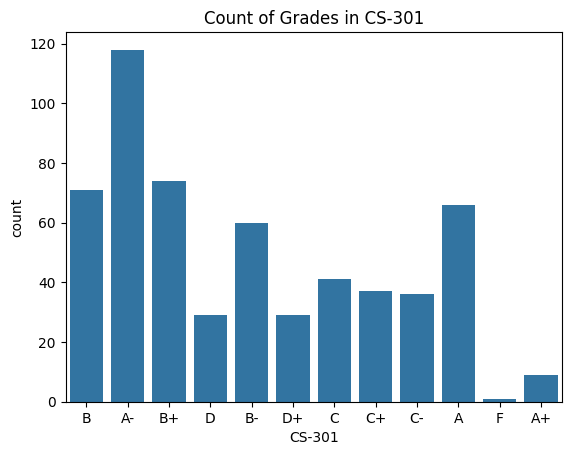

In [147]:
# Count of Grades in CS-301
sns.countplot(x='CS-301',data=df)
plt.title('Count of Grades in CS-301')
plt.show()

In CS-301, Most students got "A-".

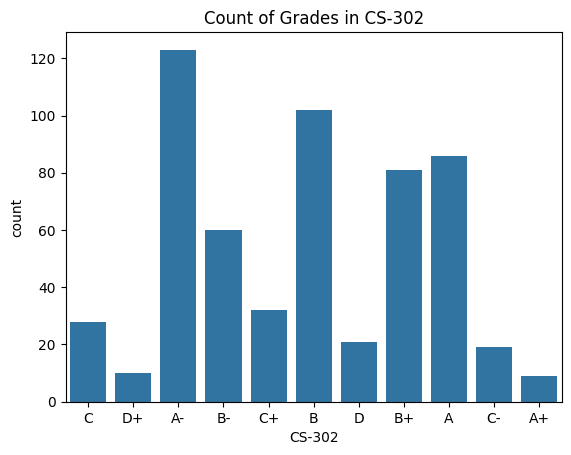

In [148]:
# Count of Grades in CS-302
sns.countplot(x='CS-302',data=df)
plt.title('Count of Grades in CS-302')
plt.show()

In CS-302, Most students got "A-".

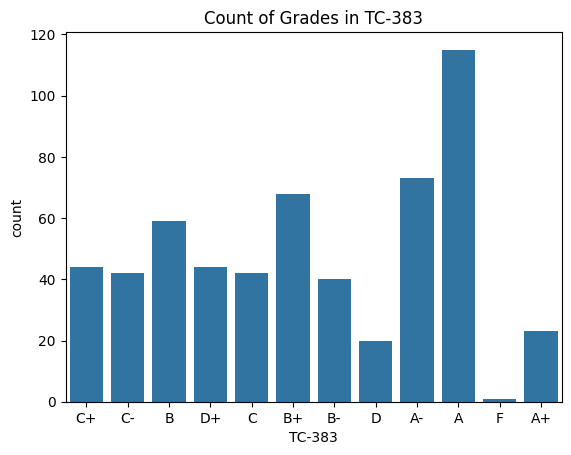

In [149]:
# Count of Grades in TC-383
sns.countplot(x='TC-383',data=df)
plt.title('Count of Grades in TC-383')
plt.show()

In TC-383, Most students got "A".

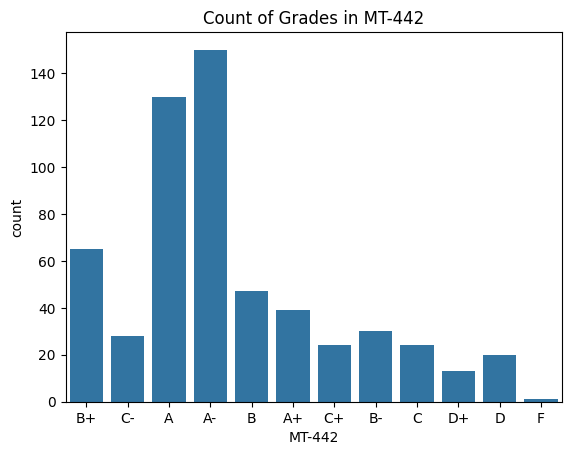

In [150]:
# Count of Grades in MT-442
sns.countplot(x='MT-442',data=df)
plt.title('Count of Grades in MT-442')
plt.show()

In MT-442, Most students got "A-".

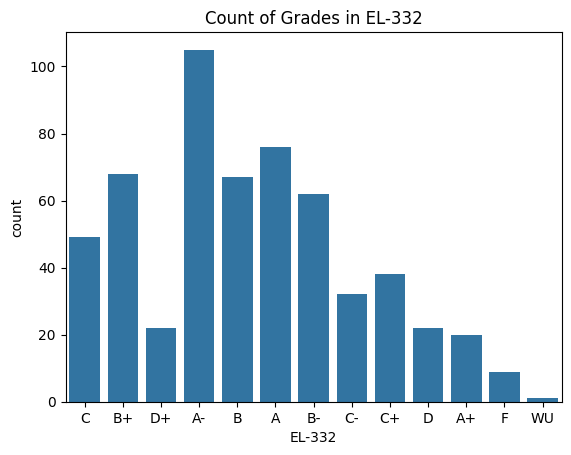

In [151]:
# Count of Grades in EL-332
sns.countplot(x='EL-332',data=df)
plt.title('Count of Grades in EL-332')
plt.show()

In EL-332, Most students got "A-".

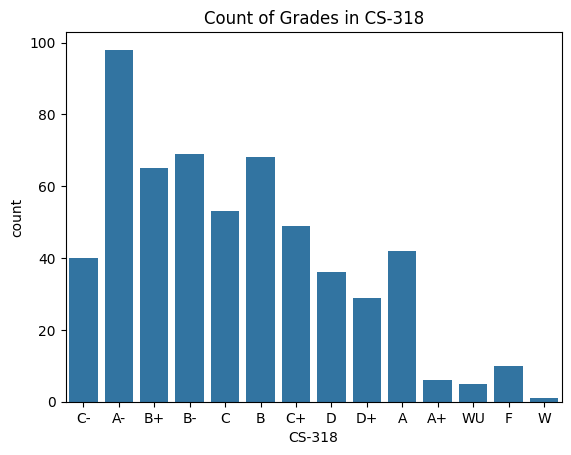

In [152]:
# Count of Grades in CS-318
sns.countplot(x='CS-318',data=df)
plt.title('Count of Grades in CS-318')
plt.show()

In CS-318, Most students got "A-".

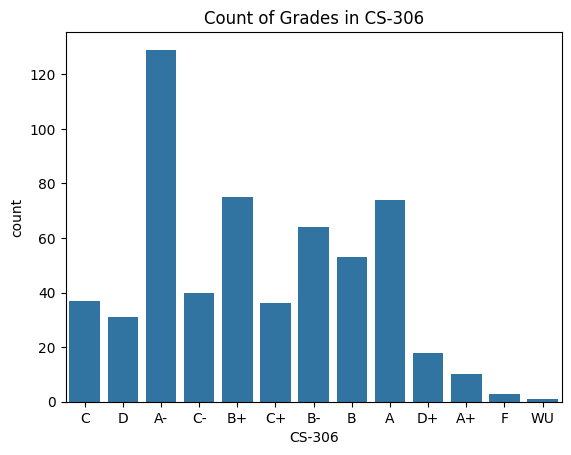

In [153]:
# Count of Grades in CS-306
sns.countplot(x='CS-306',data=df)
plt.title('Count of Grades in CS-306')
plt.show()

In CS-306, Most students got "A-".

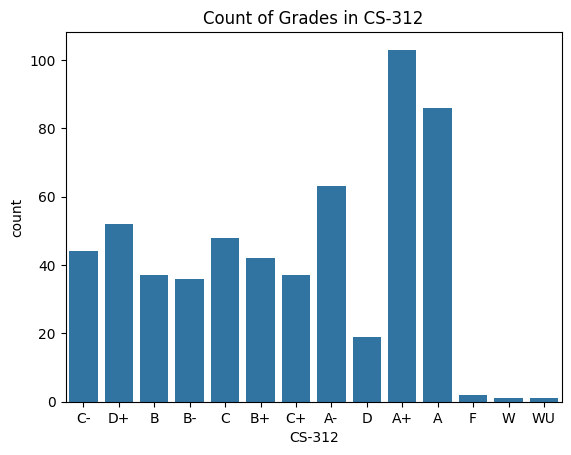

In [154]:
# Count of Grades in CS-312
sns.countplot(x='CS-312',data=df)
plt.title('Count of Grades in CS-312')
plt.show()

In CS-312, Most students got "A+".

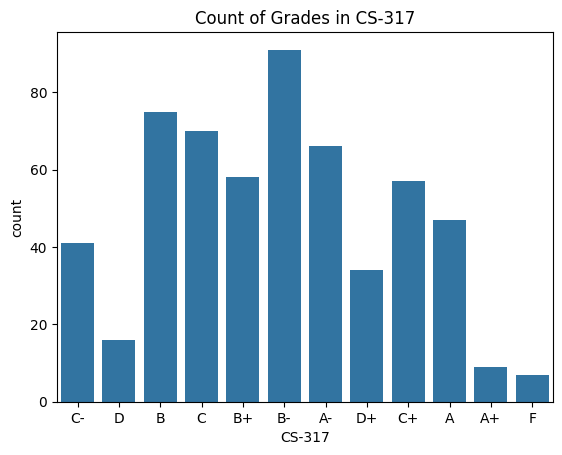

In [155]:
# Count of Grades in CS-317
sns.countplot(x='CS-317',data=df)
plt.title('Count of Grades in CS-317')
plt.show()

In CS-317, most students got "B-".

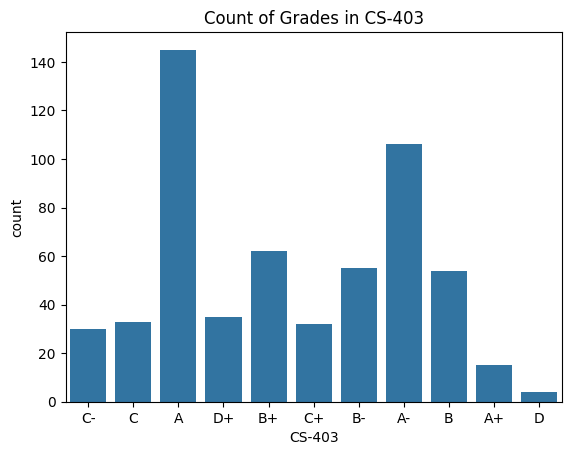

In [157]:
# Count of Grades in CS-403
sns.countplot(x='CS-403',data=df)
plt.title('Count of Grades in CS-403')
plt.show()

In CS-403, Most Students Got "A".

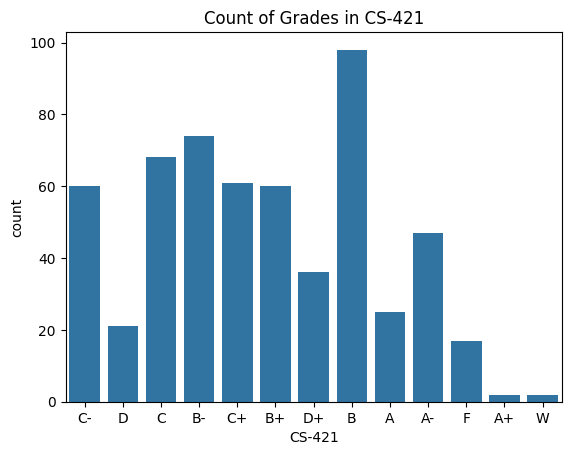

In [158]:
# Count of Grades in CS-421
sns.countplot(x='CS-421',data=df)
plt.title('Count of Grades in CS-421')
plt.show()

In CS-421, most students got "B".

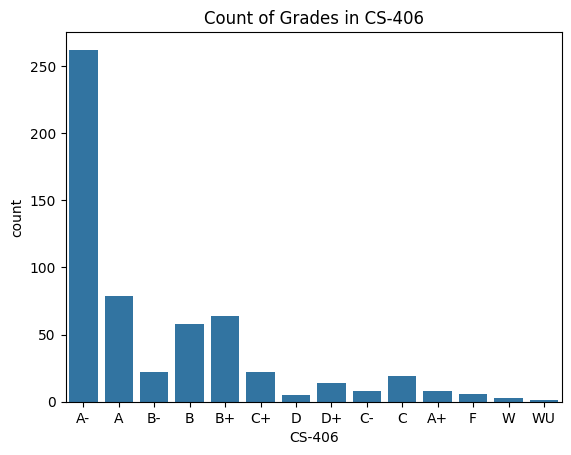

In [159]:
# Count of Grades in CS-406
sns.countplot(x='CS-406',data=df)
plt.title('Count of Grades in CS-406')
plt.show()

In CS-406, most students got "A-".

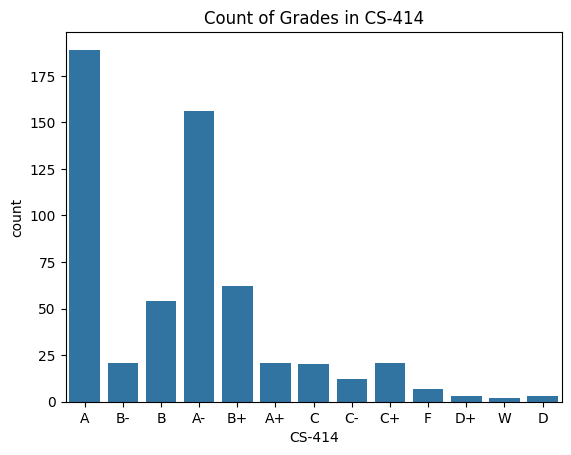

In [160]:
# Count of Grades in CS-414
sns.countplot(x='CS-414',data=df)
plt.title('Count of Grades in CS-414')
plt.show()

In CS-414, most students got "A".

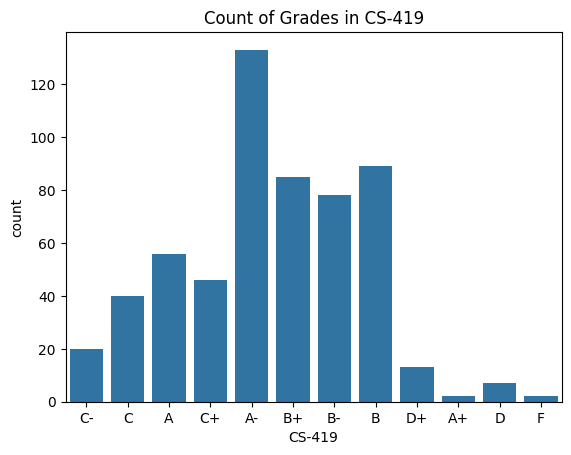

In [161]:
# Count of Grades in CS-419
sns.countplot(x='CS-419',data=df)
plt.title('Count of Grades in CS-419')
plt.show()

In CS-419, most students got "A-".

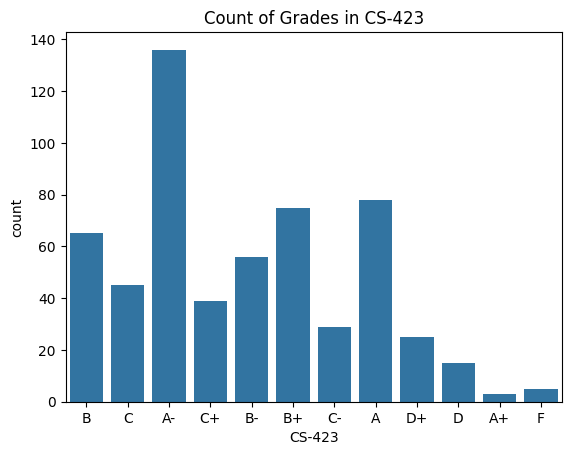

In [162]:
# Count of Grades in CS-423
sns.countplot(x='CS-423',data=df)
plt.title('Count of Grades in CS-423')
plt.show()

In CS-423, most students got "A-".

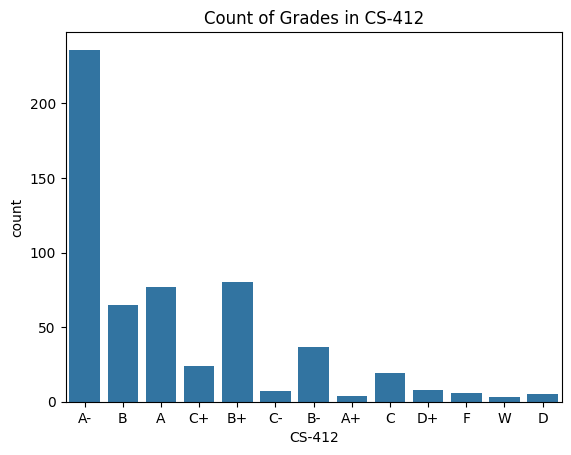

In [163]:
# Count of Grades in CS-412
sns.countplot(x='CS-412',data=df)
plt.title('Count of Grades in CS-412')
plt.show()

In CS-412, Most Students got "A-".

# Encoding

In [164]:
from sklearn.preprocessing import LabelEncoder

In [165]:
for d in df.iloc[:,0:-1].columns:
    df[d]=LabelEncoder().fit_transform(df[d])

In [166]:
df.head(10)

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448
5,0,5,3,10,7,2,7,3,4,4,...,6,5,7,7,2,2,4,5,3,3.026
6,5,8,2,9,2,3,0,4,2,4,...,5,6,4,5,0,2,4,4,0,2.957
7,4,4,7,6,6,2,8,2,3,2,...,10,4,4,6,0,4,2,2,2,3.043
8,2,6,2,10,3,2,2,2,4,2,...,4,3,5,7,0,2,4,2,0,3.358
9,0,3,7,3,3,2,6,5,2,0,...,7,5,4,5,0,0,2,3,0,3.247


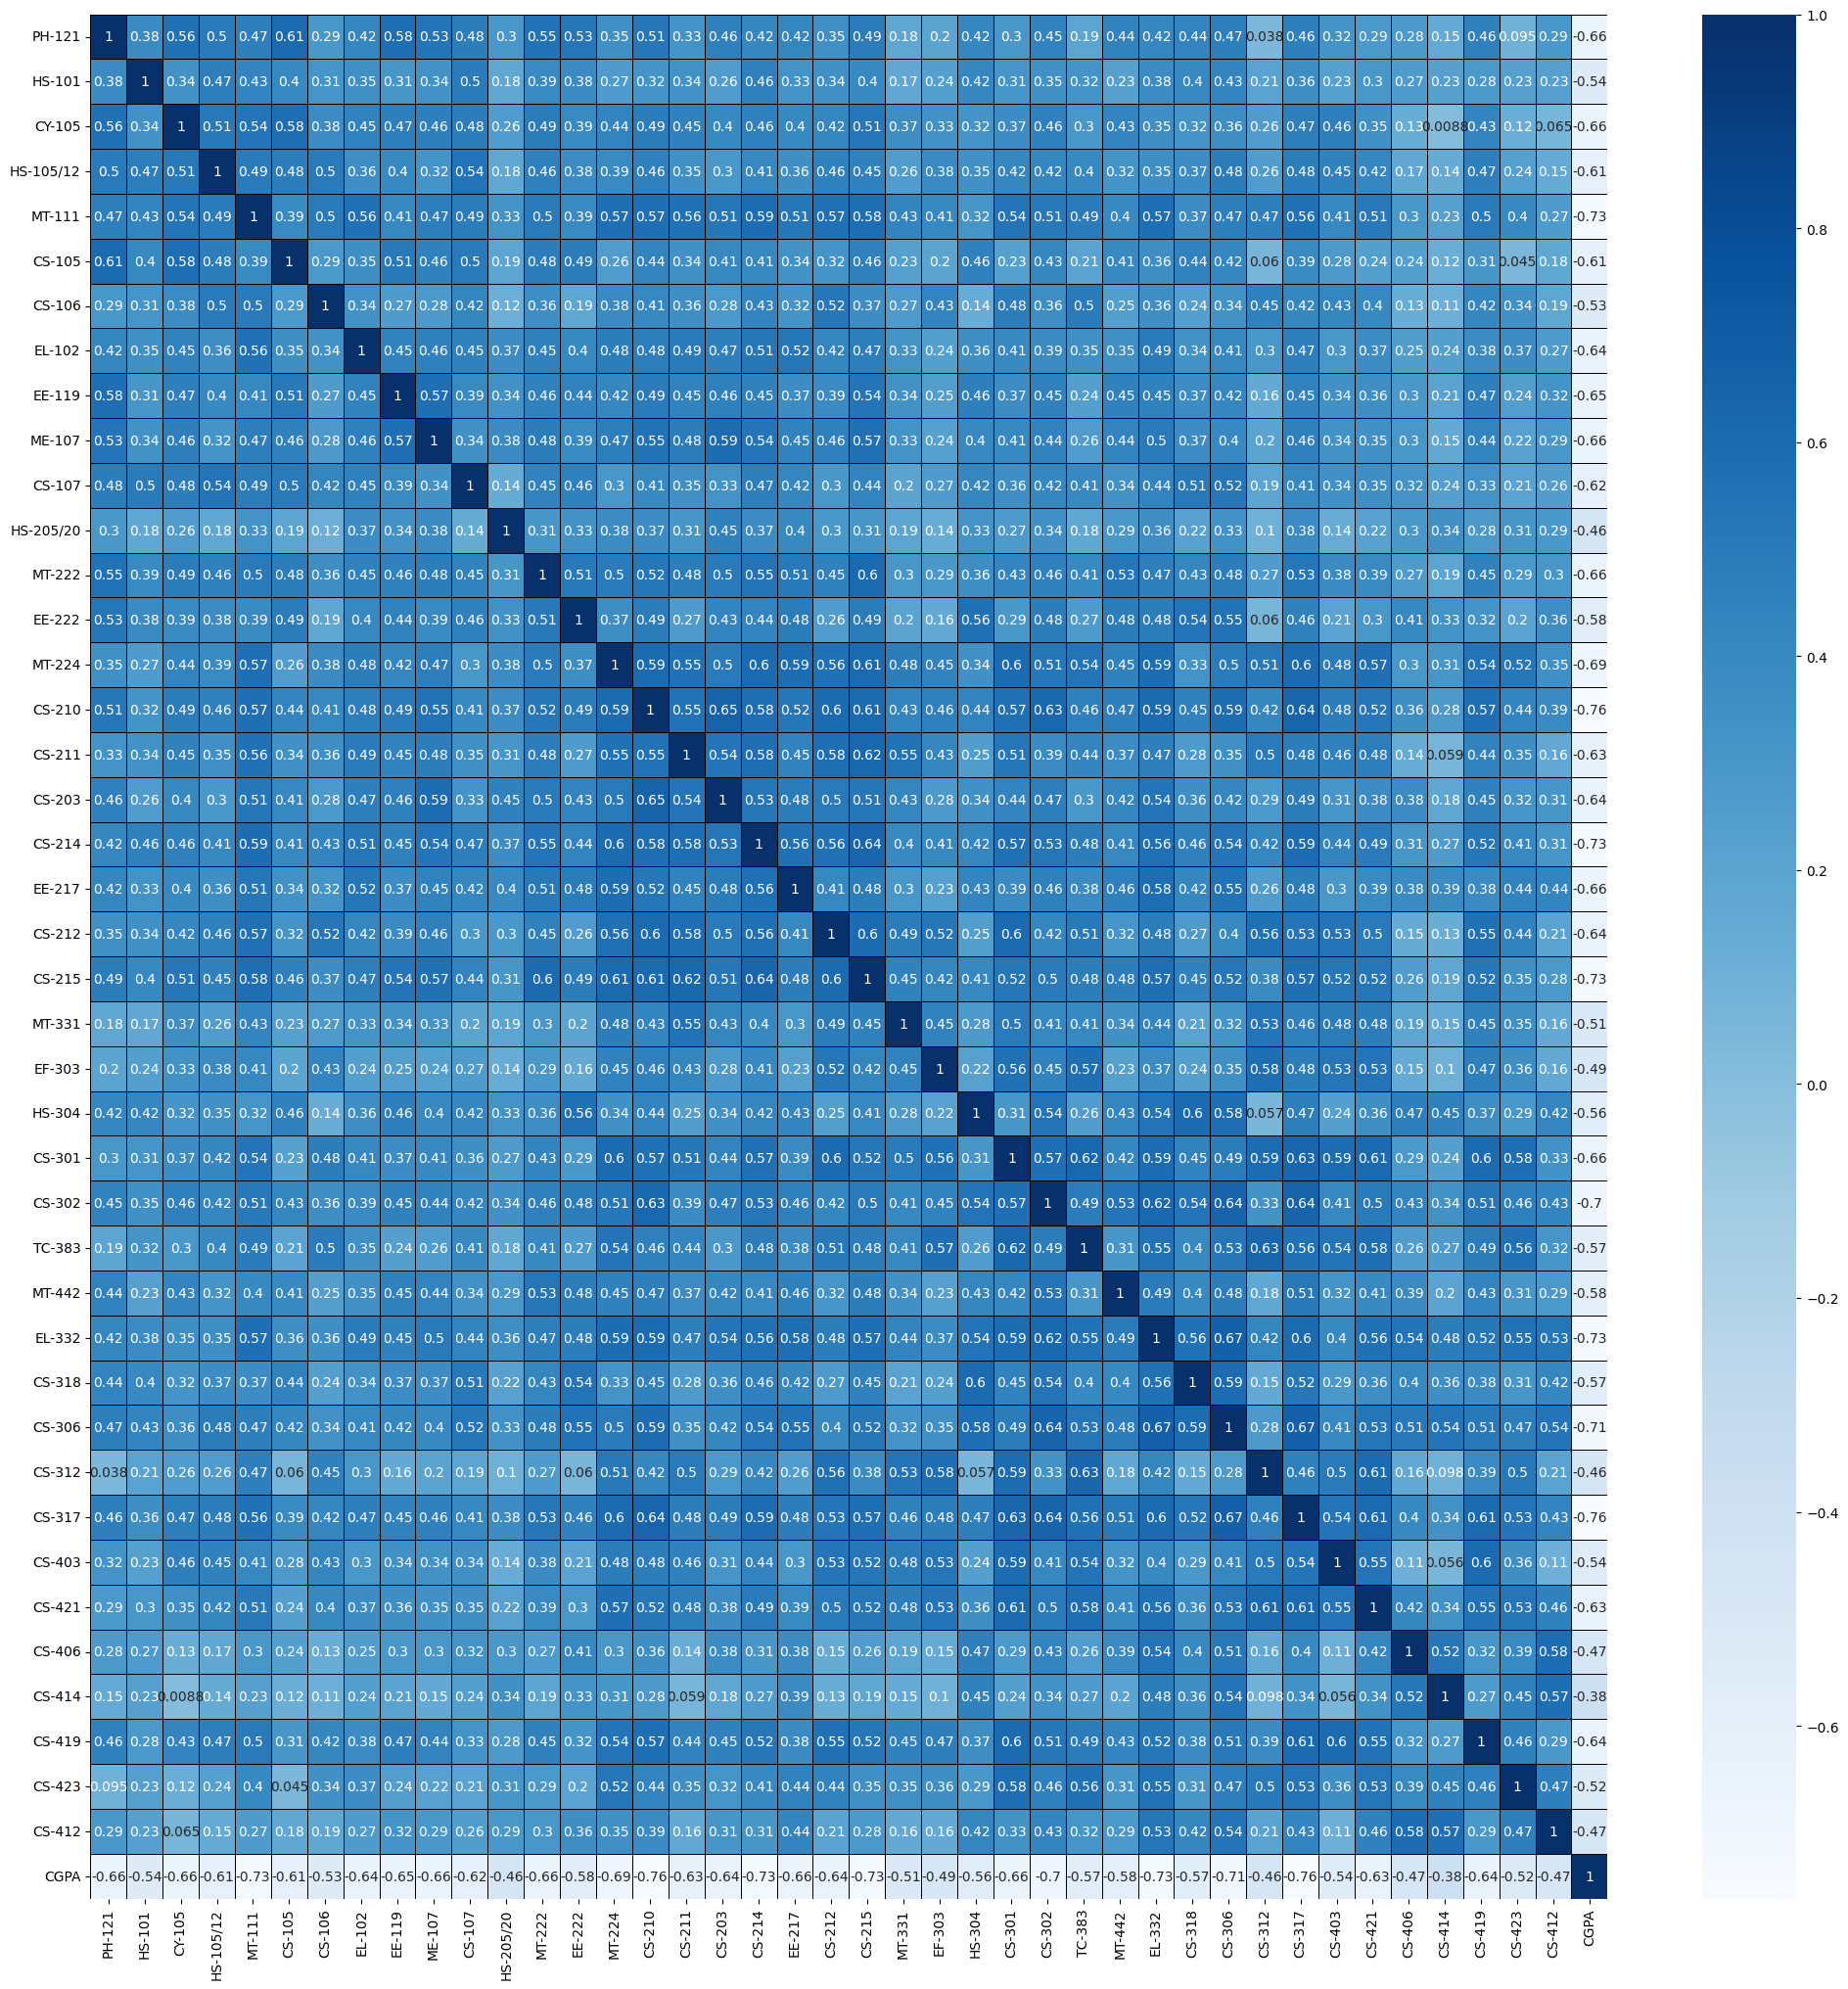

In [167]:
# Correlation
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True,cmap='Blues',linecolor='black',linewidths=0.5)
plt.show()

All Independent Variables Showing Negative Correlation to The Target Variable.

In [168]:
# seperating Input And Output Data
x1=df.drop('CGPA',axis=1)
y1=df['CGPA']

In [169]:
x1

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,5,10,8,6,8,10,9,8,5,8,...,6,8,8,8,8,2,0,8,3,2
1,0,9,10,9,5,6,9,0,10,9,...,9,10,9,6,9,2,5,6,6,3
2,0,3,0,5,4,0,5,4,2,2,...,2,3,3,0,6,0,0,0,2,0
3,9,7,10,9,9,2,10,8,9,7,...,8,10,6,10,8,5,3,7,7,7
4,2,2,2,4,0,0,2,4,0,2,...,2,5,4,4,5,2,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,4,2,2,0,0,0,4,4,3,0
567,1,0,0,0,0,0,0,2,0,0,...,2,4,4,0,0,2,3,2,6,2
568,3,0,2,4,0,0,0,0,0,3,...,4,2,3,0,4,0,6,4,2,2
569,0,4,9,0,9,10,5,8,5,8,...,4,9,3,3,8,9,6,3,5,6


# Scaling

In [170]:
# Importing Standard Scaler
from sklearn.preprocessing import StandardScaler

In [171]:
# Scaling Input Data
x1=pd.DataFrame(StandardScaler().fit_transform(x1),columns=x1.columns)
x1.head(10)

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0.400402,1.770900,1.722261,0.549869,1.374222,2.657832,1.790004,1.333963,0.419492,1.024565,...,0.663660,1.169315,1.155824,1.533685,0.958939,-0.399094,-0.960095,1.740513,-0.346121,-0.450178
1,-1.242052,1.411559,2.397448,1.488043,0.369509,1.173242,1.790004,-1.307365,2.302589,1.342687,...,1.715324,1.764660,1.521056,0.862110,1.325686,-0.399094,1.042149,0.900418,0.727983,-0.021043
2,-1.242052,-0.744483,-0.978490,0.237145,0.034605,-1.053643,0.322008,0.013299,-0.710366,-0.884168,...,-0.738559,-0.319046,-0.670339,-1.152616,0.225444,-1.210063,-0.960095,-1.619869,-0.704156,-1.308446
3,1.714365,0.692879,2.397448,1.488043,1.709126,-0.311348,2.157003,1.333963,1.925970,0.706443,...,1.364769,1.764660,0.425358,2.205260,0.958939,0.817361,0.241251,1.320466,1.086017,1.695494
4,-0.585070,-1.103823,-0.303302,-0.075580,-1.305012,-1.053643,-0.778989,0.013299,-1.463605,-0.884168,...,-0.738559,0.276298,-0.305107,0.190534,-0.141304,-0.399094,-0.960095,-0.779774,-0.704156,-1.308446
5,-1.242052,-0.025802,0.034291,1.800767,1.039317,-0.311348,1.056006,-0.316867,0.042873,-0.247924,...,-0.037450,0.573971,0.060126,1.197897,0.592191,-0.399094,-0.159198,0.060322,0.369948,-0.021043
6,0.400402,1.052219,-0.303302,1.488043,-0.635204,0.059800,-1.512987,0.013299,-0.710366,-0.247924,...,1.014214,0.276298,0.425358,0.190534,-0.141304,-1.210063,-0.159198,0.060322,0.011914,-1.308446
7,0.071911,-0.385142,1.384667,0.549869,0.704413,-0.311348,1.423005,-0.647033,-0.333747,-0.884168,...,-0.037450,1.764660,-0.305107,0.190534,0.225444,-1.210063,0.641700,-0.779774,-0.704156,-0.450178
8,-0.585070,0.333538,-0.303302,1.800767,-0.300299,-0.311348,-0.778989,-0.647033,0.042873,-0.884168,...,-0.738559,-0.021374,-0.670339,0.526322,0.592191,-1.210063,-0.159198,0.060322,-0.704156,-1.308446
9,-1.242052,-0.744483,1.384667,-0.388304,-0.300299,-0.311348,0.689007,0.343465,-0.710366,-1.520412,...,-0.738559,0.871643,0.060126,0.190534,-0.141304,-1.210063,-0.960095,-0.779774,-0.346121,-1.308446


# Multicolinearity

In [172]:
# Importing VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [173]:
# Creating function to check multicolinearity
def vif(data):
    vif=pd.DataFrame()
    vif['Columns']=data.columns
    vif['VIF']=[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
    return vif

In [174]:
# Checking VIF values.
vif(x1)

,Columns,VIF
0,PH-121,2.827608
1,HS-101,1.771294
2,CY-105,2.514966
3,HS-105/12,2.293035
4,MT-111,2.638921
5,CS-105,2.366597
6,CS-106,1.927701
7,EL-102,1.968027
8,EE-119,2.190768
9,ME-107,2.294552


Considering 10 as threshold value.
No Multicolinearity present in the DataSet.

# Modeling

In [175]:
# Importing Regression task libraries
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor,GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

# Random State

In [176]:
# Creating function to find best random state.
def bestRS(x,y):
    rs=0
    ac=0
    for i in range(1,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
        lr=LinearRegression()
        lr.fit(x_train,y_train)
        pred=lr.predict(x_test)
        acc=r2_score(y_test,pred)
        if acc>ac:
            ac=+acc
            rs=+i
    print('Highest r2_score {}% at random_state:- {}'.format(round(ac*100,2),rs))

In [177]:
#Finding Best Random State
bestRS(x1,y1)

Highest r2_score 96.43% at random_state:- 72


In [178]:
# Spliting training and testing data
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x1,y1,test_size=0.30,random_state=72)
print(xtrain1.shape)
print(xtest1.shape)
print(ytrain1.shape)
print(ytest1.shape)

(399, 41)
(172, 41)
(399,)
(172,)


In [179]:
# Creating Variables for ML models.
lr1=LinearRegression()
rd1=Ridge()
la1=Lasso()
svr1=SVR()
dtc1=DecisionTreeRegressor()
knr1=KNR()
gbr1=GradientBoostingRegressor()
rfr1=RandomForestRegressor()
etr1=ExtraTreesRegressor()
abr1=AdaBoostRegressor()

In [180]:
# Creating list of ML model's Variables.
models1=[lr1,rd1,la1,svr1,dtc1,knr1,gbr1,rfr1,etr1,abr1]

In [181]:
# Iterating each model to check which model is perfroming better.
for m in models1:
    m.fit(xtrain1,ytrain1)
    predM1=m.predict(xtest1)
    M_r2score1=r2_score(ytest1,predM1)*100
    print('Model:- ',m)
    print('r2score ',M_r2score1)
    print('MSE ',mean_squared_error(ytest1,predM1))
    print('MAE ',mean_absolute_error(ytest1,predM1))
    print('RMSE ',np.sqrt(mean_squared_error(ytest1,predM1)))
    print('Cross_val_score of {}'.format(m))
    scoreM1=cross_val_score(m,x1,y1)
    print(scoreM1)
    print(scoreM1.mean())
    print('Differnce Between cross val score and r2 score of {} Model:- '.format(m),M_r2score1-scoreM1.mean()*100)
    print('\n')

Model:-  LinearRegression()
r2score  96.43494726169241
MSE  0.013741931476875238
MAE  0.0893834077440856
RMSE  0.11722598464877673
Cross_val_score of LinearRegression()
[0.8927601  0.93427094 0.90082619 0.94061762 0.84878197]
0.9034513625626616
Differnce Between cross val score and r2 score of LinearRegression() Model:-  6.089811005426256


Model:-  Ridge()
r2score  96.45753308300019
MSE  0.013654871668355327
MAE  0.0891088999255161
RMSE  0.11685406141146883
Cross_val_score of Ridge()
[0.89292168 0.93429658 0.90102969 0.94099039 0.84890717]
0.9036291005426633
Differnce Between cross val score and r2 score of Ridge() Model:-  6.094623028733849


Model:-  Lasso()
r2score  -0.2069645787602381
MSE  0.3862599915985248
MAE  0.5310373025587224
RMSE  0.6214981831015476
Cross_val_score of Lasso()
[-0.00643799 -0.0037979  -0.00364638 -0.00242138 -0.02411396]
-0.008083520623131602
Differnce Between cross val score and r2 score of Lasso() Model:-  0.6013874835529222


Model:-  SVR()
r2score  97.21

Conclusion:- RandomForestRegressor has the least differnce of 3.06 between r2_score and cv mean score and also giving the 94 r2_score.

# Dropping Columns With Highest Nan Values.

In [182]:
# Checking Null Values.
df1.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [183]:
df1.shape

(571, 43)

In [184]:
# Dropping Column with Highest Null Values.
df1.drop(['CS-406','CS-412'],axis=1,inplace=True)
df1.shape

(571, 41)

In [185]:
df1.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-414       13
CS-419       13
CS-423       14
CGPA          0
dtype: int64

In [186]:
# Filling Null Values in Remaining columns.
for d in df1.columns:
    df1[d].fillna(df1[d].mode()[0],inplace=True)

In [187]:
df1.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-414       0
CS-419       0
CS-423       0
CGPA         0
dtype: int64

In [188]:
# Encoding Input Data
for d in df1.iloc[:,0:-1].columns:
    df1[d]=LabelEncoder().fit_transform(df1[d])

In [189]:
df1

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-414,CS-419,CS-423,CGPA
0,0,5,10,8,6,8,10,9,8,5,...,8,6,8,8,8,8,0,8,3,2.205
1,1,0,9,10,9,5,6,9,0,10,...,2,9,10,9,6,9,5,6,6,2.008
2,2,0,3,0,5,4,0,5,4,2,...,2,2,3,3,0,6,0,0,2,3.608
3,3,9,7,10,9,9,2,10,8,9,...,4,8,10,6,10,8,3,7,7,1.906
4,4,2,2,2,4,0,0,2,4,0,...,5,2,5,4,4,5,0,2,2,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,3,0,0,2,1,0,2,2,1,...,0,4,2,2,0,0,4,4,3,3.798
567,567,1,0,0,0,0,0,0,2,0,...,1,2,4,4,0,0,3,2,6,3.772
568,568,3,0,2,4,0,0,0,0,0,...,7,4,2,3,0,4,6,4,2,3.470
569,569,0,4,9,0,9,10,5,8,5,...,5,4,9,3,3,8,6,3,5,2.193


In [190]:
# Dividing Input and output Data
x2=df1.drop(['CGPA','Seat No.'],axis=1)
y2=df1['CGPA']

In [191]:
x2.shape

(571, 39)

In [192]:
y2.shape

(571,)

In [193]:
# Scaling Input Data
x2=pd.DataFrame(StandardScaler().fit_transform(x2),columns=x2.columns)
x2.head(10)

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-414,CS-419,CS-423
0,0.400402,1.770900,1.722261,0.549869,1.374222,2.657832,1.790004,1.333963,0.419492,1.024565,...,0.642941,1.050785,0.663660,1.169315,1.155824,1.533685,0.958939,-0.960095,1.740513,-0.346121
1,-1.242052,1.411559,2.397448,1.488043,0.369509,1.173242,1.790004,-1.307365,2.302589,1.342687,...,0.642941,-0.977378,1.715324,1.764660,1.521056,0.862110,1.325686,1.042149,0.900418,0.727983
2,-1.242052,-0.744483,-0.978490,0.237145,0.034605,-1.053643,0.322008,0.013299,-0.710366,-0.884168,...,-0.044548,-0.977378,-0.738559,-0.319046,-0.670339,-1.152616,0.225444,-0.960095,-1.619869,-0.704156
3,1.714365,0.692879,2.397448,1.488043,1.709126,-0.311348,2.157003,1.333963,1.925970,0.706443,...,2.017921,-0.301324,1.364769,1.764660,0.425358,2.205260,0.958939,0.241251,1.320466,1.086017
4,-0.585070,-1.103823,-0.303302,-0.075580,-1.305012,-1.053643,-0.778989,0.013299,-1.463605,-0.884168,...,-0.732038,0.036703,-0.738559,0.276298,-0.305107,0.190534,-0.141304,-0.960095,-0.779774,-0.704156
5,-1.242052,-0.025802,0.034291,1.800767,1.039317,-0.311348,1.056006,-0.316867,0.042873,-0.247924,...,-0.732038,0.036703,-0.037450,0.573971,0.060126,1.197897,0.592191,-0.159198,0.060322,0.369948
6,0.400402,1.052219,-0.303302,1.488043,-0.635204,0.059800,-1.512987,0.013299,-0.710366,-0.247924,...,-0.732038,0.374731,1.014214,0.276298,0.425358,0.190534,-0.141304,-0.159198,0.060322,0.011914
7,0.071911,-0.385142,1.384667,0.549869,0.704413,-0.311348,1.423005,-0.647033,-0.333747,-0.884168,...,-0.388293,-0.639351,-0.037450,1.764660,-0.305107,0.190534,0.225444,0.641700,-0.779774,-0.704156
8,-0.585070,0.333538,-0.303302,1.800767,-0.300299,-0.311348,-0.778989,-0.647033,0.042873,-0.884168,...,-0.732038,-0.301324,-0.738559,-0.021374,-0.670339,0.526322,0.592191,-0.159198,0.060322,-0.704156
9,-1.242052,-0.744483,1.384667,-0.388304,-0.300299,-0.311348,0.689007,0.343465,-0.710366,-1.520412,...,-0.044548,0.036703,-0.738559,0.871643,0.060126,0.190534,-0.141304,-0.960095,-0.779774,-0.346121


In [194]:
# Checking VIF Values.
vif(x2)

,Columns,VIF
0,PH-121,2.782815
1,HS-101,1.764737
2,CY-105,2.465749
3,HS-105/12,2.253385
4,MT-111,2.624243
5,CS-105,2.364629
6,CS-106,1.919582
7,EL-102,1.954079
8,EE-119,2.165033
9,ME-107,2.284500


In [195]:
# Finding Best Random Model.
bestRS(x2,y2)

Highest r2_score 96.26% at random_state:- 72


In [196]:
# Splitting Training testing Data.
xtrain2,xtest2,ytrain2,ytest2=train_test_split(x2,y2,test_size=0.30,random_state=72)

In [197]:
# Creating variable of models.
lr2=LinearRegression()
rd2=Ridge()
la2=Lasso()
svr2=SVR()
dtc2=DecisionTreeRegressor()
knr2=KNR()
gbr2=GradientBoostingRegressor()
rfr2=RandomForestRegressor()
etr2=ExtraTreesRegressor()
abr2=AdaBoostRegressor()

In [198]:
# Creating List
models2=[lr2,rd2,la2,svr2,dtc2,knr2,gbr2,rfr2,etr2,abr2]

In [199]:
# Iterating each model to check which model is perfroming better.
for m in models2:
    m.fit(xtrain2,ytrain2)
    predM2=m.predict(xtest2)
    M_r2score2=r2_score(ytest2,predM2)*100
    print('Model:- ',m)
    print('r2score ',M_r2score2)
    print('MSE ',mean_squared_error(ytest2,predM2))
    print('MAE ',mean_absolute_error(ytest2,predM2))
    print('RMSE ',np.sqrt(mean_squared_error(ytest2,predM2)))
    print('Cross_val_score of {}'.format(m))
    scoreM2=cross_val_score(m,x2,y2)
    print(scoreM2)
    print(scoreM2.mean())
    print('Differnce Between cross val score and r2 score of {} Model:- '.format(m),M_r2score2-scoreM2.mean()*100)
    print('\n')

Model:-  LinearRegression()
r2score  96.26074879757863
MSE  0.014413400746181195
MAE  0.09194673122073764
RMSE  0.12005582345801137
Cross_val_score of LinearRegression()
[0.88944692 0.93325227 0.90042958 0.93940158 0.84146152]
0.9007983741686061
Differnce Between cross val score and r2 score of LinearRegression() Model:-  6.180911380718015


Model:-  Ridge()
r2score  96.28383695462101
MSE  0.014324404623180107
MAE  0.09167502480309395
RMSE  0.11968460478766726
Cross_val_score of Ridge()
[0.88959254 0.93326848 0.90063416 0.93980473 0.84158783]
0.9009775460669772
Differnce Between cross val score and r2 score of Ridge() Model:-  6.186082347923289


Model:-  Lasso()
r2score  -0.2069645787602381
MSE  0.3862599915985248
MAE  0.5310373025587224
RMSE  0.6214981831015476
Cross_val_score of Lasso()
[-0.00643799 -0.0037979  -0.00364638 -0.00242138 -0.02411396]
-0.008083520623131602
Differnce Between cross val score and r2 score of Lasso() Model:-  0.6013874835529222


Model:-  SVR()
r2score  97.

Conclusion:- All models are performing Almost Identical on dataset without columns with maximun null values as they are performing on Dataset with filled null Values.

# Dropping Null values from All Columns and columns with Maximum Null Values.

In [200]:
#Checking Null Values
df2.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [201]:
# dimension
df2.shape

(571, 43)

In [202]:
# dropping columns with Highest Null Values and Seat No.
df2.drop(['Seat No.','CS-406','CS-412'],axis=1,inplace=True)

In [203]:
df2.isnull().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-414       13
CS-419       13
CS-423       14
CGPA          0
dtype: int64

In [204]:
# Dropping remaining null values.
df2.dropna(axis=0,inplace=True)

In [205]:
df2.shape

(557, 40)

In [206]:
df2.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-414       0
CS-419       0
CS-423       0
CGPA         0
dtype: int64

In [207]:
df2.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-414,CS-419,CS-423,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C,C-,C-,C-,C-,A,C-,B,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,A-,D,D+,D,C,D,B-,C,C,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,A-,A-,B,B,A,C,A,A,A-,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,B+,C-,D+,C,D+,C-,B,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,A-,B-,B+,B+,B-,A,A-,A-,3.448


In [208]:
# Encoding Dataset
for d in df2.iloc[:,0:-1].columns:
    df2[d]=LabelEncoder().fit_transform(df2[d])
df2.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-414,CS-419,CS-423,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,6,8,8,8,8,0,8,3,2.205
1,0,9,10,9,5,6,9,0,10,9,...,2,9,10,9,6,9,5,6,6,2.008
2,0,3,0,5,4,0,5,4,2,2,...,2,2,3,3,0,6,0,0,2,3.608
3,9,7,10,9,9,2,10,8,9,7,...,4,8,10,6,10,8,3,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,2,5,4,4,5,0,2,2,3.448


In [209]:
# Splitting Input Data And Output Data
x3=df2.drop('CGPA',axis=1)
y3=df2['CGPA']

In [210]:
# Scaling Input Data.
x3=pd.DataFrame(StandardScaler().fit_transform(x3),columns=x3.columns)
x3.head(10)

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-414,CS-419,CS-423
0,0.446707,1.796441,1.857667,0.585076,1.436949,2.757771,1.847319,1.401998,0.447282,1.069323,...,0.647529,1.063870,0.666964,1.180394,1.151342,1.525939,0.950911,-0.980161,1.727982,-0.361592
1,-1.239036,1.435468,2.568083,1.539825,0.404200,1.235394,1.847319,-1.311861,2.363716,1.393026,...,0.647529,-0.992494,1.724362,1.782206,1.513248,0.849498,1.318985,1.019655,0.887383,0.705935
2,-1.239036,-0.730371,-0.983996,0.266827,0.059950,-1.048172,0.350110,0.045069,-0.702577,-0.872893,...,-0.044079,-0.992494,-0.742900,-0.324136,-0.658188,-1.179825,0.214765,-0.980161,-1.634414,-0.717435
3,1.795302,0.713522,2.568083,1.539825,1.781199,-0.286983,2.221621,1.401998,1.980429,0.745621,...,2.030746,-0.307039,1.371896,1.782206,0.427530,2.202380,0.950911,0.219728,1.307682,1.061778
4,-0.564739,-1.091344,-0.273580,-0.051423,-1.317049,-1.048172,-0.772796,0.045069,-1.469151,-0.872893,...,-0.735687,0.035688,-0.742900,0.277676,-0.296282,0.173057,-0.153309,-0.980161,-0.793815,-0.717435
5,-1.239036,-0.008425,0.081628,1.858074,1.092700,-0.286983,1.098714,-0.294164,0.063996,-0.225488,...,-0.735687,0.035688,-0.037968,0.578582,0.065624,1.187719,0.582838,-0.180235,0.046784,0.350093
6,0.446707,1.074495,-0.273580,1.539825,-0.628549,0.093611,-1.521400,0.045069,-0.702577,-0.225488,...,-0.735687,0.378415,1.019430,0.277676,0.427530,0.173057,-0.153309,-0.180235,0.046784,-0.005750
7,0.109558,-0.369398,1.502459,0.585076,0.748450,-0.286983,1.473016,-0.633396,-0.319291,-0.872893,...,-0.389883,-0.649767,-0.037968,1.782206,-0.296282,0.173057,0.214765,0.619691,-0.793815,-0.717435
8,-0.564739,0.352548,-0.273580,1.858074,-0.284300,-0.286983,-0.772796,-0.633396,0.063996,-0.872893,...,-0.735687,-0.307039,-0.742900,-0.023230,-0.658188,0.511278,0.582838,-0.180235,0.046784,-0.717435
9,-1.239036,-0.730371,1.502459,-0.369672,-0.284300,-0.286983,0.724412,0.384301,-0.702577,-1.520299,...,-0.044079,0.035688,-0.742900,0.879488,0.065624,0.173057,-0.153309,-0.980161,-0.793815,-0.361592


In [211]:
# Vif values
vif(x3)

,Columns,VIF
0,PH-121,2.723951
1,HS-101,1.787469
2,CY-105,2.390814
3,HS-105/12,2.229321
4,MT-111,2.600258
5,CS-105,2.336476
6,CS-106,1.973467
7,EL-102,1.934576
8,EE-119,2.162343
9,ME-107,2.279268


In [212]:
# Best Random Score
bestRS(x3,y3)

Highest r2_score 99.05% at random_state:- 128


In [213]:
# Splitting Train Test Data.
xtrain3,xtest3,ytrain3,ytest3=train_test_split(x3,y3,test_size=0.30,random_state=128)

In [214]:
# Creating variable of models.
lr3=LinearRegression()
rd3=Ridge()
la3=Lasso()
svr3=SVR()
dtc3=DecisionTreeRegressor()
knr3=KNR()
gbr3=GradientBoostingRegressor()
rfr3=RandomForestRegressor()
etr3=ExtraTreesRegressor()
abr3=AdaBoostRegressor()

In [215]:
# Creating List
models3=[lr3,rd3,la3,svr3,dtc3,knr3,gbr3,rfr3,etr3,abr3]

In [216]:
# Iterating each model to check which model is perfroming better.
for m in models3:
    m.fit(xtrain3,ytrain3)
    predM3=m.predict(xtest3)
    M_r2score3=r2_score(ytest3,predM3)*100
    print('Model:- ',m)
    print('r2score ',M_r2score3)
    print('MSE ',mean_squared_error(ytest3,predM3))
    print('MAE ',mean_absolute_error(ytest3,predM3))
    print('RMSE ',np.sqrt(mean_squared_error(ytest3,predM3)))
    print('Cross_val_score of {}'.format(m))
    scoreM3=cross_val_score(m,x3,y3)
    print(scoreM3)
    print(scoreM3.mean())
    print('Differnce Between cross val score and r2 score of {} Model:- '.format(m),M_r2score3-scoreM3.mean()*100)
    print('\n')

Model:-  LinearRegression()
r2score  99.05265611844689
MSE  0.003347695415168067
MAE  0.04565427294318574
RMSE  0.05785927250811288
Cross_val_score of LinearRegression()
[0.98458449 0.99072573 0.98711464 0.98799444 0.97888398]
0.9858606578711713
Differnce Between cross val score and r2 score of LinearRegression() Model:-  0.466590331329769


Model:-  Ridge()
r2score  99.05303286853271
MSE  0.003346364067006622
MAE  0.045638617791387726
RMSE  0.05784776630957
Cross_val_score of Ridge()
[0.9846131  0.99074556 0.98712937 0.98800765 0.97889506]
0.9858781486971573
Differnce Between cross val score and r2 score of Ridge() Model:-  0.465217998816982


Model:-  Lasso()
r2score  -0.020266073022967568
MSE  0.3534486184759079
MAE  0.5013983657730444
RMSE  0.5945154484754016
Cross_val_score of Lasso()
[-0.00312951 -0.00822762 -0.0008695  -0.00023638 -0.02554442]
-0.007601486214524255
Differnce Between cross val score and r2 score of Lasso() Model:-  0.739882548429458


Model:-  SVR()
r2score  96.9

Conclusion:-
1) Models Are Performing better on dataset with removed null values compared to previous 2 datasets.
2) LinearRegresson and Ridge are best performing Model with 99.05 r2_score and difference of 0.46 between r2_score and cv mean score.
3) Considering Ridge as best performing Model. Because it is a Regularization Model.

# Hyper Parameter Tuning

In [217]:
# Importing Grid Search CV.
from sklearn.model_selection import GridSearchCV

In [219]:
from sklearn.linear_model import Ridge

In [231]:
# Rigde
RG=Ridge()

In [232]:
# Parameters
params={'alpha':[0.00001,0.0001,0.001,0.01,0.1,1.0],
       'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga','lbfgs']}

In [233]:
# creating GridSearchCV variable.
gscv=GridSearchCV(RG,params,cv=5)

In [234]:
gscv.fit(xtrain3,ytrain3)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']})

In [235]:
# Best Alpha
gscv.best_params_

{'alpha': 1.0, 'solver': 'lsqr'}

In [237]:
ModelRG=Ridge(alpha=1.0,solver='lsqr')

In [238]:
ModelRG.fit(xtrain3,ytrain3)

Ridge(solver='lsqr')

In [239]:
r2_score(ytest3,ModelRG.predict(xtest3))

0.9905309161429054

# Saving The Model

In [240]:
# Importing Pickle
import pickle

In [241]:
# creating filename
filename='CGPA.pkl'

In [242]:
# Saving Model
pickle.dump(ModelRG,open(filename,'wb'))

In [243]:
# Loading Model
model=pickle.load(open(filename,'rb'))

In [244]:
# Predicting cgpa
pred=model.predict(xtest3)

In [245]:
r2_score(ytest3,pred)

0.9905309161429054

In [251]:
# Creating DataFrame
pred_df=pd.DataFrame({'Original':ytest3,'Predicted':pred})
pred_df

,Original,Predicted
447,1.882,1.824173
132,2.407,2.439105
365,3.721,3.767902
538,3.499,3.444886
260,3.751,3.875360
...,...,...
162,3.571,3.618917
477,2.414,2.388874
168,2.982,2.924037
536,3.504,3.451101
